# Ridge Regresyon

# Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [5]:
ridge_model

Ridge(alpha=0.1)

In [6]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [7]:
(10**np.linspace(10,-2,100)*0.5)[0:10]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08])

In [8]:
# belirlediğimiz çeşitli lambda(=alpha) değerlerine göre katsayıların nasıl olduğuna bakıyoruz

In [9]:
# burada katsayı gözleminden bahsediyoruz, hata gözleminden değil

In [10]:
# ridge ve lasso regresyonda öbür regresyonlardan farklı olarak katsayılara temas ettik
# burada lambda değeri bizim katsayılara uyguladığımız cezanın şiddetini belirliyor! -> etkisine bundan bakıyoruz

In [11]:
# yapay sinir ağları ve ağaca dayalı yöntemlerde de lambda kritik bir yaklaşımdır (Ceza İşlemleri)

In [12]:
import matplotlib.pyplot as plt

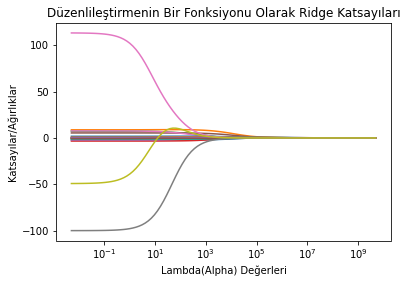

In [13]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) # her lambda değerinin 19 katsayısı olacak -> 19 değişkenimiz var
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [14]:
# ridge regresyonda ceza değeri ile dikkat etmemiz gereken şey gereksiz parametreleri 0'a yaklaştırmasıdır
# ama bunu yaparken bazı parametrelere gereken etkisinden az değer verme riski de var

# Tahmin

In [15]:
y_pred = ridge_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
np.sqrt(mean_squared_error(y_pred, y_test)) # rmse değeri, alpha değeri = 0.1 iken gerçekleştirdik

357.0517922282827

# Model Tuning

In [18]:
# gözlemlediğimiz lambdalara göre değişen katsayı değerlerinin hangisinin dağa iyi olacağını bulacağız

In [19]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [20]:
from sklearn.linear_model import RidgeCV

In [21]:
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error", 
                   normalize = True)

In [22]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [23]:
ridge_cv.alpha_ #optimum lambda değeri

0.7599555414764666

In [24]:
# sklearn içinde optimum lambda değerini bulmak için oluşturulmuş fonksiyonları kullandık, no brute force

In [25]:
# şimdi optimum lambda değeri ile final modelimizi oluşturacağız

In [26]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                    normalize = True,).fit(X_train, y_train) # tune edilmiş model

In [27]:
# Son ve güvenilir tahminler

In [28]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))) # son rmse yani test hatamız

386.6826429756415

# ------------------------------------------------------------------

# Lasso Regresyon

In [30]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388035, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [34]:
lasso_model

Lasso(alpha=0.1)

In [35]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679552436, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137493998, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/Users/alperencngzz/opt/anaconda3/lib/python3.9/site

Text(0, 0.5, 'weights')

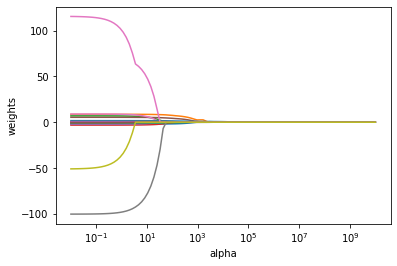

In [38]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [39]:
# ridge'ye benziyor ama farkı katsayılar ringe'de 0'a yakın kısımlarda 0 olmazken burada oluyor

# Tahmin

In [41]:
y_pred = lasso_model.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_pred, y_test)) # rmse değeri, alpha değeri = 0.1 iken gerçekleştirdik

356.83301242997425

# Model Tuning

In [43]:
from sklearn.linear_model import LassoCV

In [45]:
lasso_cv_model = LassoCV(alphas = None, 
                   cv = 10, 
                   max_iter = 10000, 
                   normalize = True).fit(X_train, y_train)

In [46]:
lasso_cv_model.alpha_

0.39406126432470073

In [48]:
# final modeli kurma

In [51]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [52]:
lasso_tuned.fit(X_train, y_train)

/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523998, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [53]:
# final test hatası

In [54]:
y_pred = lasso_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_pred, y_test))

356.5226376958367

 Ridge regresyon modelinin final hata değeri 386'ydı yani lasso modeli ridge modelinden bu veriseti üzerinde daha iyi iş yaptı diyebiliriz.

# ------------------------------------------------------------------

# ElasticNet Regresyonu

# Model

In [56]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [57]:
from sklearn.linear_model import ElasticNet

In [60]:
enet_model = ElasticNet().fit(X_train, y_train)

/Users/alperencngzz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367297, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [61]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [62]:
enet_model.intercept_

-6.465955602113013

# Tahmin

In [64]:
enet_model

ElasticNet()

In [66]:
y_pred = enet_model.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.16765481812456

In [69]:
r2_score(y_test, y_pred) #açıklanabilirlik oranı

0.4107022246932688

# Model Tuning

In [70]:
from sklearn.linear_model import ElasticNetCV

In [73]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [74]:
enet_cv_model.alpha_

5230.7647364798695

In [75]:
# final modeli oluşturuyoruz

In [78]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [80]:
y_pred = enet_tuned.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

Doğrusal Modellerin sonuna gelmiş olduk.

Elimizdeki verisetine en iyi fit eden model Lasso oluyor.